$$\textbf{Reconocimiento estadístico de Patrones. Tarea 1b}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{lightblue}{Librerías \space }$ <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
print("Tarea realizada en MacOs. \nLas versiones de las librerías y de python utilizadas fueron:\n")
from platform import python_version
print("Python version", python_version())
print("Numpy version", np.__version__)
print("Pandas version", pd.__version__)
print("seaborn version", sns.__version__)



Tarea realizada en MacOs. 
Las versiones de las librerías y de python utilizadas fueron:

Python version 3.11.7
Numpy version 1.26.3
Pandas version 2.1.4
seaborn version 0.12.2


$\color{lightblue}{Datos \space }$ <br>

In [3]:
archivo_data = '/Users/ely/Documents/Maestria/segundo_semestre/patrones/01_Tarea_patrones/oef2.data'
#leemos como una matriz de numpy
datos_temperatura = np.loadtxt(archivo_data)


In [4]:
#nombres de las columnas
nombres_meses = ["enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"]

nombres_estaciones = ["St. John_s", "Charlottetown", "Halifax", "Sydney", "Yarmouth",
                    "Fredericton", "Arvida", "Montreal", "Quebec City", "Schefferville",
                    "Sherbrooke", "Kapuskasing", "London", "Ottawa", "Thunder Bay",
                    "Toronto", "Churchill", "The Pas", "Winnipeg", "Prince Albert",
                    "Regina", "Beaverlodge", "Calgary", "Edmonton", "Kamloops",
                    "Prince George", "Prince Rupert", "Vancouver", "Victoria", "Dawson",
                    "Whitehorse", "Frobisher Bay", "Inuvik", "Resolute", "Yellowknife"]

# hacemos el DataFrame usanso la matriz definida anteriormente pero transpuesta y los nomres de las estaciones 
df_temperatura = pd.DataFrame(datos_temperatura, columns=nombres_meses,index=nombres_estaciones)


In [5]:
df_temperatura.head(5)

,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
St. John_s,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5
Charlottetown,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9
Halifax,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9
Sydney,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8
Yarmouth,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3


In [6]:
df_temperatura_transpuesta = df_temperatura.transpose()

In [7]:
df_temperatura_transpuesta.head(5)

,St. John_s,Charlottetown,Halifax,Sydney,Yarmouth,Fredericton,Arvida,Montreal,Quebec City,Schefferville,...,Prince George,Prince Rupert,Vancouver,Victoria,Dawson,Whitehorse,Frobisher Bay,Inuvik,Resolute,Yellowknife
enero,-3.9,-7.1,-6.0,-4.7,-2.7,-9.2,-15.0,-10.2,-12.1,-22.8,...,-12.1,-0.2,2.5,4.1,-30.7,-20.7,-25.6,-29.6,-32.1,-28.8
febrero,-4.5,-7.5,-6.1,-5.9,-3.2,-8.4,-13.1,-9.0,-10.8,-21.2,...,-6.1,2.3,4.6,5.8,-23.5,-13.2,-25.9,-28.9,-33.2,-25.1
marzo,-2.3,-3.1,-1.6,-2.5,0.3,-2.4,-5.9,-2.5,-4.5,-15.1,...,-1.8,3.0,5.8,6.7,-14.8,-8.2,-22.7,-25.0,-31.4,-18.9
abril,1.2,2.3,3.3,2.0,4.7,4.1,2.9,5.7,3.3,-7.2,...,4.3,5.4,8.8,9.1,-1.6,0.3,-14.3,-14.3,-23.1,-6.9
mayo,5.4,8.5,9.2,7.4,9.2,10.8,10.0,13.0,10.8,1.2,...,9.3,8.3,12.2,11.9,7.6,6.7,-3.2,-0.8,-10.9,5.0


$\color{lightblue}{a) }$ <br>

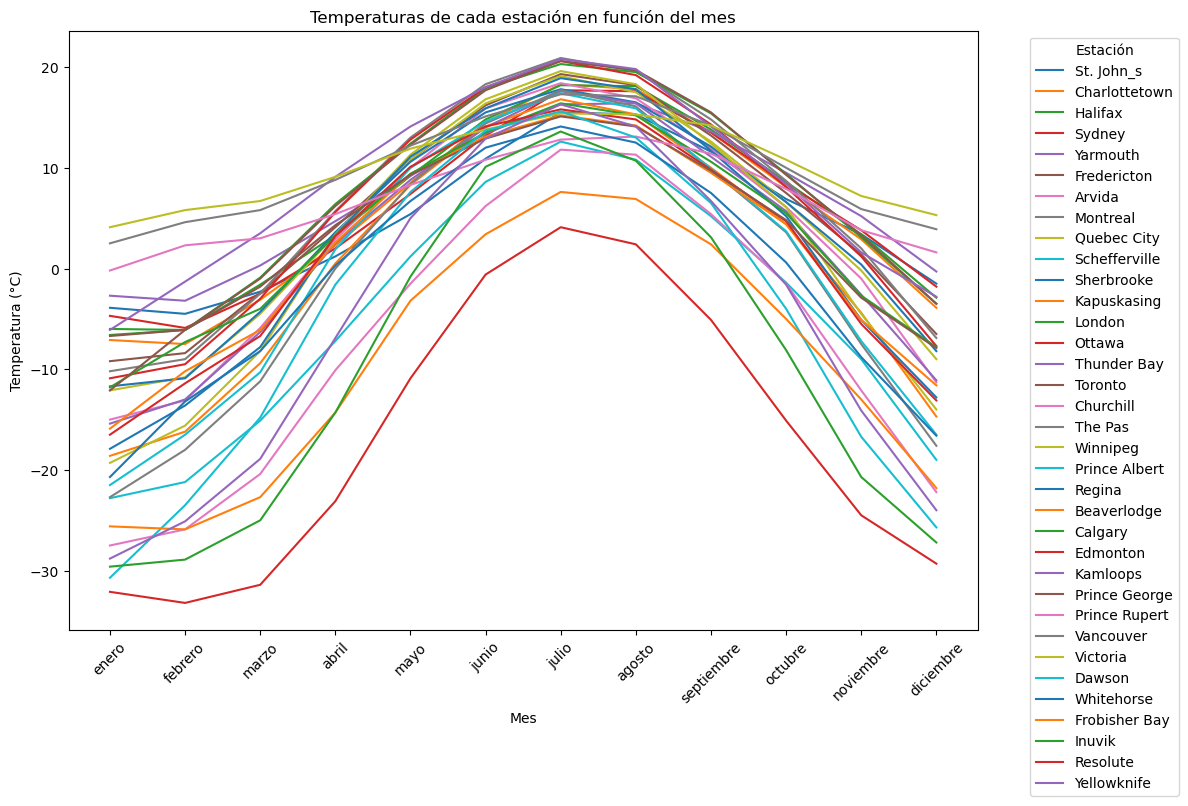

In [8]:
# Graficar las temperaturas de cada estación en función del mes
plt.figure(figsize=(12, 8))
for estacion in df_temperatura_transpuesta.columns:
    plt.plot(nombres_meses, df_temperatura_transpuesta[estacion], label=estacion)

plt.title('Temperaturas de cada estación en función del mes')
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.xticks(range(12), nombres_meses, rotation=45)
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


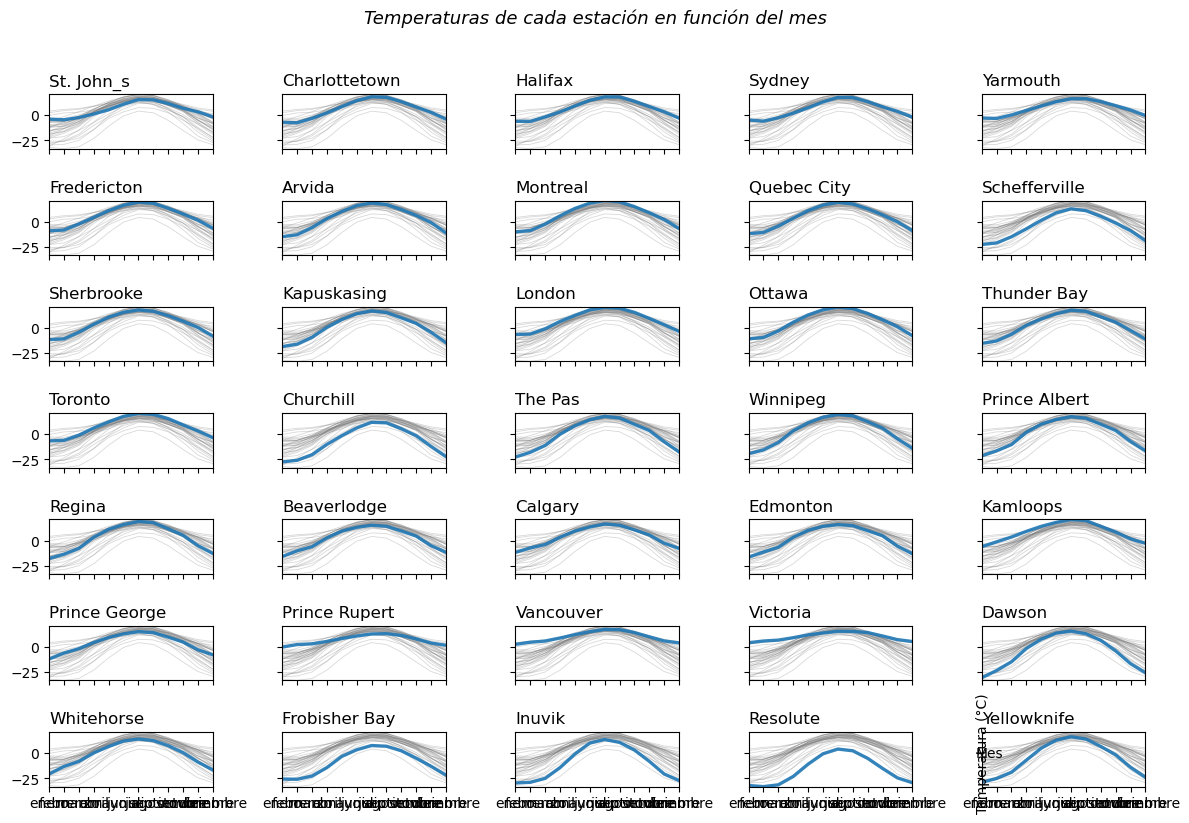

In [23]:

# Graficamos las temperaturas de cada estación en función del mes
plt.figure(figsize=(12, 8))
num = 0
for estacion in df_temperatura_transpuesta.columns:
    num += 1
    
    plt.subplot(7, 5, num)
    
    # Graficamos todas las estaciones
    for estacion_temp in df_temperatura_transpuesta.columns:
        plt.plot(nombres_meses, df_temperatura_transpuesta[estacion_temp], marker='', color='grey', linewidth=0.6, alpha=0.3)
    
    #temperatura de la estación actual
    plt.plot(nombres_meses, df_temperatura_transpuesta[estacion], marker='', linewidth=2.4, alpha=0.9, label=estacion)
    plt.xlim(nombres_meses[0], nombres_meses[-1])
    plt.ylim(df_temperatura_transpuesta.min().min(), df_temperatura_transpuesta.max().max())
    
    if num in range(31):
        plt.tick_params(labelbottom=False)
    if num not in [1, 6, 11, 16, 21, 26, 31]:
        plt.tick_params(labelleft=False)
    plt.title(estacion, loc='left', fontsize=12, fontweight=0)
    
plt.suptitle("Temperaturas de cada estación en función del mes", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.text(0.5, 0.02, 'Mes', ha='center', va='center')
plt.text(0.06, 0.5, 'Temperatura (°C)', ha='center', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


$\color{lightblue}{b) }$ <br>

In [12]:
# Estandarizar los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(df_temperatura_transpuesta)

# Inicializar PCA
pca = PCA()

# Calcular los componentes principales
componentes_principales = pca.fit_transform(datos_escalados)

# Variabilidad explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_



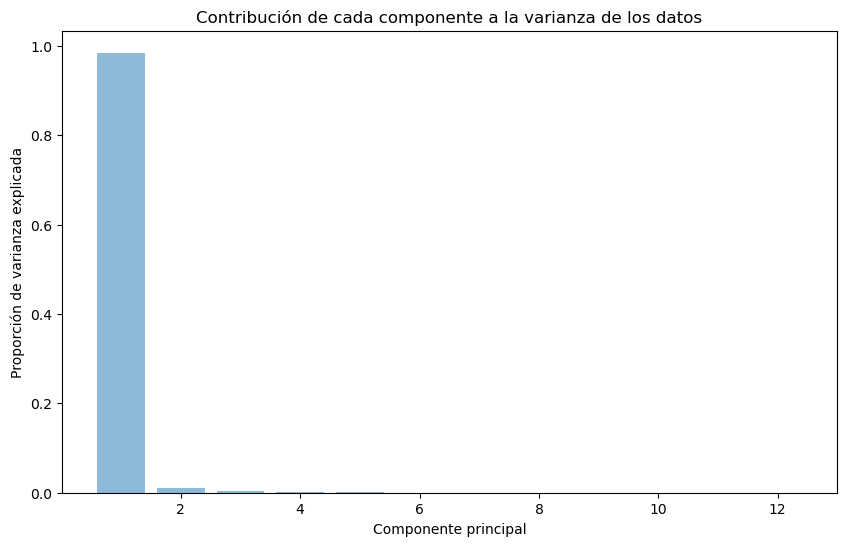

In [13]:

varianza_explicada = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.5, align='center')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componente principal')
plt.title('Contribución de cada componente a la varianza de los datos')
plt.show()

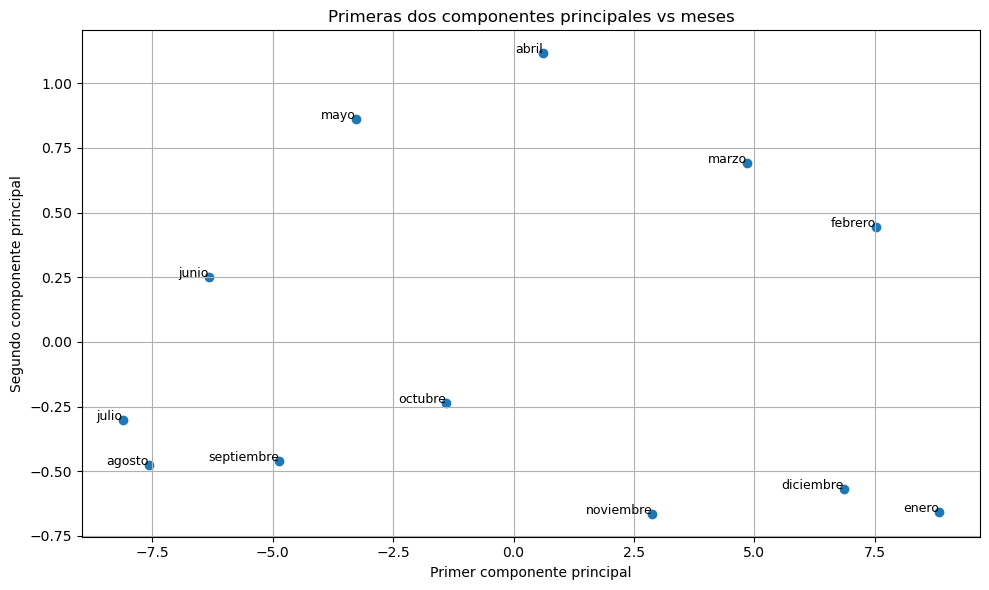

In [15]:
# Obtener las dos primeras componentes principales
primer_componente = componentes_principales[:, 0]
segundo_componente = componentes_principales[:, 1]

# Graficar las dos primeras componentes principales en función de los meses
plt.figure(figsize=(10, 6))
plt.scatter(primer_componente, segundo_componente)
plt.title('Primeras dos componentes principales vs meses')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
for i, mes in enumerate(nombres_meses):
    plt.text(primer_componente[i], segundo_componente[i], mes, fontsize=9, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

$\color{lightblue}{c) }$ <br>

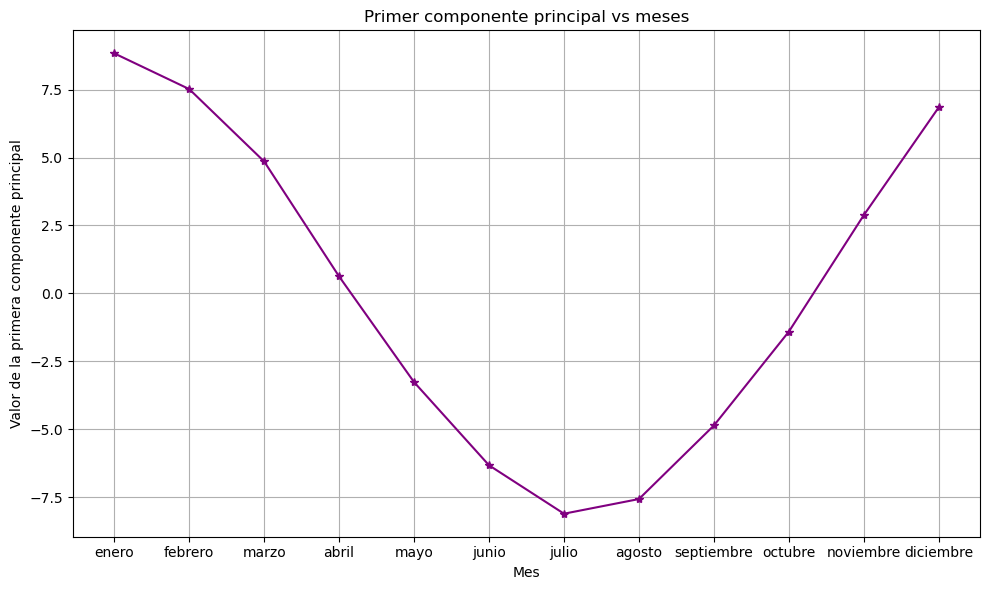

In [24]:
primer_componente_meses = primer_componente[:12]

# Graficamos la primea componente principal en función de los meses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), primer_componente_meses, marker='*',color="purple")
plt.title('Primer componente principal vs meses')
plt.xlabel('Mes')
plt.ylabel('Valor de la primera componente principal')
plt.xticks(range(1, 13), nombres_meses)
plt.grid(True)
plt.tight_layout()
plt.show()

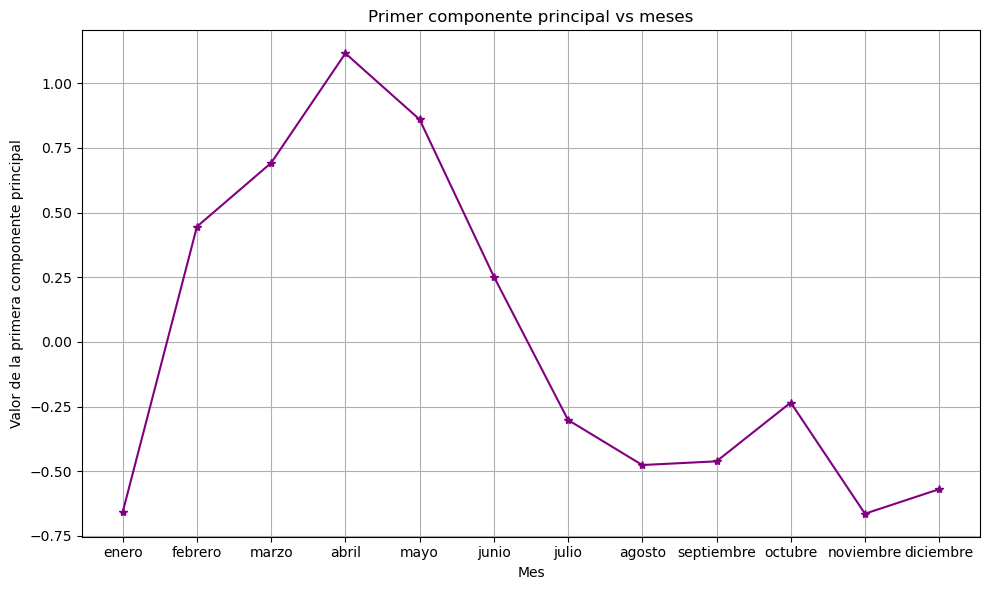

In [25]:
segunda_componente_meses = segundo_componente[:12]

# Graficamos la segundaa componente principal en función de los meses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), segunda_componente_meses, marker='*',color="purple")
plt.title('Primer componente principal vs meses')
plt.xlabel('Mes')
plt.ylabel('Valor de la primera componente principal')
plt.xticks(range(1, 13), nombres_meses)
plt.grid(True)
plt.tight_layout()
plt.show()